# Twitter Engagement Code
## Code to create a twitter object, extract relevant tweets, clean and do some frequemcy and sentiment analysis through the nltk package

Create a pickle object to securely record the twitter authentication keys obtained from the twitter developer account

In [1]:
import pickle
import os

In [2]:
#use the generated keys from twitter, this code checks if these already exist, if not create a secret credentails file otherwise
# load previous credentials, credentials should not be visible in files for security reasons

if not os.path.exists('secret_twitter_credentials.pkl'):
    Twitter={}
    Twitter['Consumer Key'] = ''
    Twitter['Consumer Secret'] = ''
    Twitter['Access Token'] = ''
    Twitter['Access Token Secret'] = ''
    with open('secret_twitter_credentials.pkl','wb') as f:
        pickle.dump(Twitter, f)
else:
    Twitter=pickle.load(open('secret_twitter_credentials.pkl','rb'))

In [3]:
# ensure that the Twitter package is installed
!pip install twitter

In [4]:
!pip install nltk

In [5]:
import numpy as np
import pandas as pd
import string
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\makro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

##  Authorizing an application to access Twitter account data

In [7]:
import twitter
#auth is an aithentication object
auth = twitter.oauth.OAuth(Twitter['Access Token'],
                           Twitter['Access Token Secret'],
                           Twitter['Consumer Key'],
                           Twitter['Consumer Secret'])

#twitter apu object, part of the Twitter Class
twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

type(twitter_api)

twitter.api.Twitter

# Look at global and local trends from Twitter

Twitter identifies locations using the Yahoo! Where On Earth ID.

In [8]:
WORLD_WOE_ID = 1
US_WOE_ID = 23424977
CA_WOE_ID = 23424775

# Added for Toronto
LOCAL_WOE_ID=4118


In [9]:

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)
canada_trends = twitter_api.trends.place(_id=CA_WOE_ID)
local_trends = twitter_api.trends.place(_id=LOCAL_WOE_ID)

In [10]:
trends=local_trends
print(type(trends))
print(list(trends[0].keys()))
#print(trends[0]['trends'])

<class 'twitter.api.TwitterListResponse'>
['trends', 'as_of', 'created_at', 'locations']


Using pretty printy JSON

In [11]:
# Look at names of the local trends
for i in local_trends[0]['trends']:
    print(i['name'])

#90DayFiance
#SEAvsGB
#GoPackGo
Aaron Rodgers
Packers
Maple Leaf Foods
Russell Wilson
Green Bay
Michael McCain
Jimmy Graham
Pete Carroll
#DidntLiveUpToTheHype
#SisterWives
Jimmy Johnson
DeMar
mccaw
derozan
Mursel
Mr. McCain
Yellow Weasel
Siakam
Marshawn Lynch
Lynette
The Outsider
Hutchinson
Greg Millen
Jonathan Huberdeau
Clowney
Troy Aikman
Tyson Barrie
Zach Hyman
Shero
Lambeau
lockett
Turner
Beast Mode
#HardToKill
#gohawks
#RHOA
#gbvssea
#CriticsChoice
#YIAYapp
#TORvsFLA
#NFCChampionship
#celebration2020
#halloffame
#Tokyo2020
#SanditonPBS
#LoveIsland
#hometownhockey


In [12]:
import json

print((json.dumps(local_trends[0], indent=1)))

{
 "trends": [
  {
   "name": "#90DayFiance",
   "url": "http://twitter.com/search?q=%2390DayFiance",
   "promoted_content": null,
   "query": "%2390DayFiance",
   "tweet_volume": 21365
  },
  {
   "name": "#SEAvsGB",
   "url": "http://twitter.com/search?q=%23SEAvsGB",
   "promoted_content": null,
   "query": "%23SEAvsGB",
   "tweet_volume": 93860
  },
  {
   "name": "#GoPackGo",
   "url": "http://twitter.com/search?q=%23GoPackGo",
   "promoted_content": null,
   "query": "%23GoPackGo",
   "tweet_volume": 122436
  },
  {
   "name": "Aaron Rodgers",
   "url": "http://twitter.com/search?q=%22Aaron+Rodgers%22",
   "promoted_content": null,
   "query": "%22Aaron+Rodgers%22",
   "tweet_volume": 35984
  },
  {
   "name": "Packers",
   "url": "http://twitter.com/search?q=Packers",
   "promoted_content": null,
   "query": "Packers",
   "tweet_volume": 279341
  },
  {
   "name": "Maple Leaf Foods",
   "url": "http://twitter.com/search?q=%22Maple+Leaf+Foods%22",
   "promoted_content": null,
   "

Lets look at the current interections between trends in Toronto and the world overall

In [13]:
# Create a dict to store sets
trends_set = {}
trends_set['world'] = set([trend['name'] for trend in world_trends[0]['trends']])

trends_set['canada'] = set([trend['name'] for trend in canada_trends[0]['trends']]) 

trends_set['toronto'] = set([trend['name'] for trend in local_trends[0]['trends']]) 

In [14]:
trends_set['world']

{'#90DayFiance',
 '#AlaskaHappyHour',
 '#BlocoDaFavorita',
 '#ChiefsKingdom',
 '#CriticsChoice',
 '#DidntLiveUpToTheHype',
 '#DuelosLaAcademia',
 '#GoPackGo',
 '#HappyLohri',
 '#HardToKill',
 '#KCvsHOU',
 '#LoveIsland',
 '#OTGala0',
 '#PSSSPSPSPSSSSPSPSPS_FOR_CHEN',
 '#RHOA',
 '#SemangatYaKamu',
 '#TaalEruption2020',
 '#TheOutsiderHBO',
 '#VivaTeleSUR',
 '#YIAYapp',
 '#bring_back_NEWX1',
 '#mondaythoughts',
 '#عشان_هالبرد_نحتاج',
 '#あなたをBLキャラ化',
 '#今のパソコン何代目',
 '#魚の名前クイズ',
 '3 SÉRIES',
 'Aaron Rodgers',
 'Adams',
 "Bill O'Brien",
 'GO PACK GO',
 'Green Bay',
 'Hall of Fame',
 'Jimmy Graham',
 'Jimmy Johnson',
 'Lambeau',
 'Mahomes',
 'Malik Turner',
 'Marshawn Lynch',
 'NFC Championship',
 'Pete Carroll',
 'Pledis',
 'Preston Smith',
 'Seahawks',
 'Texans',
 'Tre Flowers',
 'Troy Aikman',
 'Yellow Weasel',
 '新成人',
 '桃田選手'}

In [15]:
for loc in ['world','toronto','canada']:
    print(('-'*10,loc))
    print((','.join(trends_set[loc])))

('----------', 'world')
Adams,NFC Championship,#魚の名前クイズ,Jimmy Johnson,Aaron Rodgers,#VivaTeleSUR,#LoveIsland,Lambeau,Pete Carroll,Texans,Green Bay,GO PACK GO,Bill O'Brien,#OTGala0,Yellow Weasel,#KCvsHOU,#SemangatYaKamu,#DidntLiveUpToTheHype,Troy Aikman,Seahawks,3 SÉRIES,#mondaythoughts,#bring_back_NEWX1,Jimmy Graham,Marshawn Lynch,#YIAYapp,#HappyLohri,#TheOutsiderHBO,#今のパソコン何代目,#GoPackGo,#HardToKill,#TaalEruption2020,Tre Flowers,#ChiefsKingdom,#PSSSPSPSPSSSSPSPSPS_FOR_CHEN,Mahomes,#عشان_هالبرد_نحتاج,#BlocoDaFavorita,#CriticsChoice,Hall of Fame,Malik Turner,#あなたをBLキャラ化,新成人,Preston Smith,桃田選手,#DuelosLaAcademia,Pledis,#RHOA,#90DayFiance,#AlaskaHappyHour
('----------', 'toronto')
Michael McCain,Jimmy Johnson,Aaron Rodgers,#hometownhockey,#LoveIsland,Lambeau,Greg Millen,Pete Carroll,Clowney,#gohawks,Maple Leaf Foods,#halloffame,Green Bay,Tyson Barrie,#SisterWives,Yellow Weasel,#Tokyo2020,#DidntLiveUpToTheHype,#SEAvsGB,Troy Aikman,Turner,#TORvsFLA,#gbvssea,#celebration2020,The Outsider,#Sand

Lets look at an interection between these trends, these topics are trending both locally and globally!

In [16]:
print(( '='*10,'intersection of world and toronto'))
print((trends_set['world'].intersection(trends_set['toronto'])))

('==========', 'intersection of world and toronto')
{'Green Bay', 'Marshawn Lynch', '#GoPackGo', 'Yellow Weasel', '#HardToKill', '#90DayFiance', '#DidntLiveUpToTheHype', 'Jimmy Johnson', 'Troy Aikman', 'Aaron Rodgers', '#LoveIsland', 'Lambeau', '#RHOA', '#CriticsChoice', 'Jimmy Graham', 'Pete Carroll', '#YIAYapp'}


In [17]:
print(( '='*10,'intersection of canada and toronto'))
print((trends_set['canada'].intersection(trends_set['toronto'])))

('==========', 'intersection of canada and toronto')
{'Michael McCain', 'Jimmy Johnson', 'Aaron Rodgers', '#hometownhockey', '#LoveIsland', 'Lambeau', 'Greg Millen', 'Pete Carroll', 'Clowney', 'Maple Leaf Foods', '#halloffame', 'Green Bay', 'Tyson Barrie', '#SisterWives', 'Yellow Weasel', '#Tokyo2020', '#DidntLiveUpToTheHype', '#SEAvsGB', 'Troy Aikman', 'Turner', '#TORvsFLA', '#gbvssea', '#celebration2020', 'The Outsider', '#SanditonPBS', 'Jimmy Graham', '#NFCChampionship', 'Marshawn Lynch', 'Lynette', '#YIAYapp', 'Shero', '#GoPackGo', '#HardToKill', 'Hutchinson', 'derozan', 'mccaw', 'Zach Hyman', '#CriticsChoice', 'Jonathan Huberdeau', 'DeMar', 'Russell Wilson', 'lockett', 'Mursel', 'Siakam', 'Beast Mode', '#RHOA', '#90DayFiance'}


# Streaming Tweets
Now lets stream tweets regarding a trending topic on twitter

In [83]:
q = 'Toronto' 

number = 100

# https://developer.twitter.com/en/docs/tweets/search/FAQ

search_results = twitter_api.search.tweets(q=q, count=number, lang = 'en')

statuses = search_results['statuses']

In [84]:
search_results.keys()

dict_keys(['statuses', 'search_metadata'])

In [85]:
# These are the list of keys stored in each dict of the status results
# I'm interested in extracting what people are saying which is in 'text' field 
statuses[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [86]:
statuses[1]

{'created_at': 'Mon Jan 13 04:00:29 +0000 2020',
 'id': 1216570686220787712,
 'id_str': '1216570686220787712',
 'text': 'RT @TheNBACentral: DeMar DeRozan got the win in Toronto 🔥\n\n25 points \n8 rebounds \n4 assists \n2 steals \n58% FG\n\nLast 5 games \n36 PTS - 9 REB…',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'TheNBACentral',
    'name': 'NBA Central',
    'id': 1548977419,
    'id_str': '1548977419',
    'indices': [3, 17]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 604090193,
  'id_str': '604090193',
  'name': 'this is not juan',
  'screen_name': 'JRiojas56',
  'location': 'Pasadena, TX',
  'description

In [87]:
# First lets remove any duplicated results

all_text = []
filtered_statuses = []
for s in statuses:
    if not s["text"] in all_text:
        filtered_statuses.append(s)
        all_text.append(s["text"])
statuses = filtered_statuses     

In [88]:
# number of unique statuses
len(statuses)

71

In [89]:
status_list = [s['text'] for s in statuses]

In [90]:
status_list

['RT @AP: The government of Ontario sent an alert to residents\' cellphones reporting an unspecified "incident" at a nuclear power plant near…',
 'RT @TheNBACentral: DeMar DeRozan got the win in Toronto 🔥\n\n25 points \n8 rebounds \n4 assists \n2 steals \n58% FG\n\nLast 5 games \n36 PTS - 9 REB…',
 "The vote is in as 4 more #hockey players were added to the NHL All-Star Game: Toronto's Mitch Marner, Washington Ca… https://t.co/ckdnnbIIIx",
 'The Toronto Maple Leafs and Florida Panthers are the only teams since the 2004-05 lockout to not win a playoff seri… https://t.co/SPnFKrqKf5',
 '@business HI Maple leaf school,Happy new year,how is my brother \n\nToronto,Cambridge university',
 'CONTEST: Win tickets to A Musical Banquet: A Feast of Sumptuous Classical Music https://t.co/1pE3UVfPG6 #Toronto… https://t.co/TPJgIle4FN',
 'RT @Bmtgg4: @MapleLeafFoods The 2008 Canadian listeriosis outbreak was a widespread outbreak of listeriosis in Canada linked to cold cuts f…',
 '11:00 pm Sunday Janua

In [91]:
# Store tweet texts in a pandas dataframe
Topic = "Recent Tweets about " + q
search_df = pd.DataFrame({Topic:status_list})
search_df

,Recent Tweets about Toronto
0,RT @AP: The government of Ontario sent an aler...
1,RT @TheNBACentral: DeMar DeRozan got the win i...
2,The vote is in as 4 more #hockey players were ...
3,The Toronto Maple Leafs and Florida Panthers a...
4,"@business HI Maple leaf school,Happy new year,..."
...,...
66,RT @toronto4kids: Twitter #Giveaway. Enter for...
67,@NiallOfficial I'll see you in Toronto 😊
68,RT @laqerfeld: screenshots from the weeknd’s m...
69,"RT @inklessPW: meanwhile in Canada, there is g..."


In [92]:
# Create a utility function for cleaning of tweets text

def clean_text(tweet):
    ''' Takes in text and removes any words in the useless list'''
    useless = nltk.corpus.stopwords.words("english") + list(string.punctuation)
    t = tweet.split()
    new_tweet = ""
    garbage = ['RT', q,'I','the','it','a','The','It']
    for word in t:
        if not word in useless:
            if word not in garbage:
                new_tweet = new_tweet + word + " "
    
    return new_tweet

In [93]:
search_df['Clean Tweet'] = search_df[Topic].apply(clean_text)
search_df

,Recent Tweets about Toronto,Clean Tweet
0,RT @AP: The government of Ontario sent an aler...,@AP: government Ontario sent alert residents' ...
1,RT @TheNBACentral: DeMar DeRozan got the win i...,@TheNBACentral: DeMar DeRozan got win 🔥 25 poi...
2,The vote is in as 4 more #hockey players were ...,vote 4 #hockey players added NHL All-Star Game...
3,The Toronto Maple Leafs and Florida Panthers a...,Maple Leafs Florida Panthers teams since 2004-...
4,"@business HI Maple leaf school,Happy new year,...","@business HI Maple leaf school,Happy new year,..."
...,...,...
66,RT @toronto4kids: Twitter #Giveaway. Enter for...,@toronto4kids: Twitter #Giveaway. Enter chance...
67,@NiallOfficial I'll see you in Toronto 😊,@NiallOfficial I'll see 😊
68,RT @laqerfeld: screenshots from the weeknd’s m...,@laqerfeld: screenshots weeknd’s music video “...
69,"RT @inklessPW: meanwhile in Canada, there is g...","@inklessPW: meanwhile Canada, growing concern ..."


In [94]:
# Create a counter for the most common words 
# Counter takes in a list an creates a collection.counter object

from collections import Counter

words = []

for item in search_df['Clean Tweet']:
    for word in item.split():
        words.append(word)

c = Counter(words)

print(c.most_common()[:10]) # top 10

type(c)

[('toronto', 6), ('#Toronto', 6), ('nuclear', 5), ('A', 5), ('one', 5), ('alert', 4), ('listeriosis', 4), ('outbreak', 4), ('see', 4), ('live', 4)]


collections.Counter

In [95]:
Top_words = c.most_common()[:20]
Top_words

[('toronto', 6),
 ('#Toronto', 6),
 ('nuclear', 5),
 ('A', 5),
 ('one', 5),
 ('alert', 4),
 ('listeriosis', 4),
 ('outbreak', 4),
 ('see', 4),
 ('live', 4),
 ('DeMar', 3),
 ('DeRozan', 3),
 ('Canadian', 3),
 ('2020', 3),
 ('We', 3),
 ('tweets', 3),
 ('Bad', 3),
 ('Toronto,', 3),
 ('Toronto.', 3),
 ('two', 3)]

In [96]:
Top_words.pop(0)

('toronto', 6)

In [97]:
Top_words

[('#Toronto', 6),
 ('nuclear', 5),
 ('A', 5),
 ('one', 5),
 ('alert', 4),
 ('listeriosis', 4),
 ('outbreak', 4),
 ('see', 4),
 ('live', 4),
 ('DeMar', 3),
 ('DeRozan', 3),
 ('Canadian', 3),
 ('2020', 3),
 ('We', 3),
 ('tweets', 3),
 ('Bad', 3),
 ('Toronto,', 3),
 ('Toronto.', 3),
 ('two', 3)]

In [98]:
df2 = pd.DataFrame(Top_words)
df2

,0,1
0,#Toronto,6
1,nuclear,5
2,A,5
3,one,5
4,alert,4
5,listeriosis,4
6,outbreak,4
7,see,4
8,live,4
9,DeMar,3


In [99]:
df3 = df2.pivot_table(values=1,index=0)
df3.columns = ['Count']
df3

,Count
0,
#Toronto,6
2020,3
A,5
Bad,3
Canadian,3
DeMar,3
DeRozan,3
"Toronto,",3
Toronto.,3


Text(0.5, 0, 'Word Frequency')

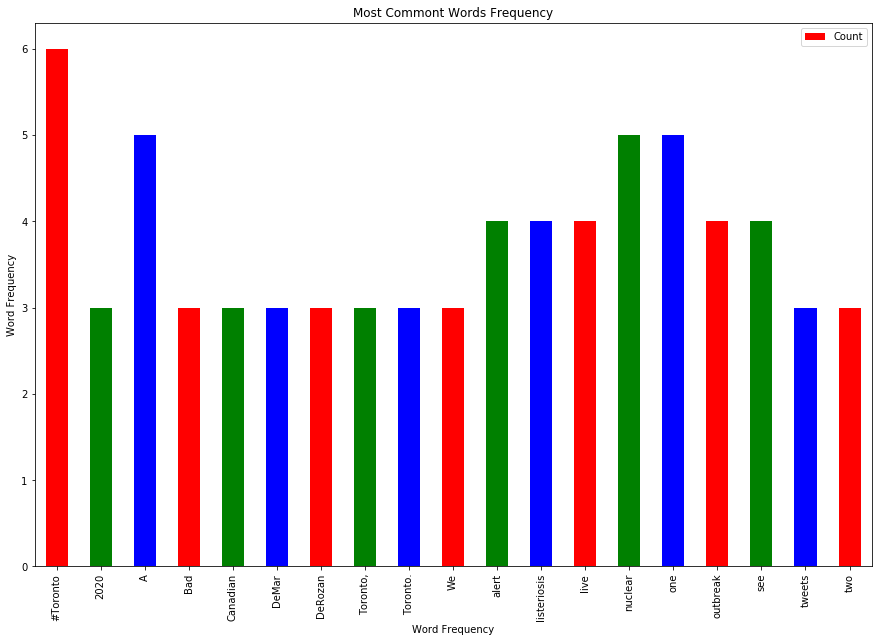

In [100]:
df3.plot.bar(figsize=(15,10),color='rgb')
plt.title('Most Commont Words Frequency')
plt.ylabel('Word Frequency')
plt.xlabel('Word Frequency')

In [102]:
# Lets look at the associated hastags for the searched query

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

In [103]:
hashtags

['hockey',
 'Toronto',
 'renewannewithane',
 'awaebillboard',
 'Toronto',
 'Canada',
 'inspired',
 'renewannewithane',
 'NowPlaying',
 'Radio',
 'Rock',
 'Toronto',
 'Toronto',
 'UkrainianPlaneCrash',
 'Toronto',
 'lostdog',
 'Toronto',
 'etobicoke',
 'Toronto',
 'photograghy',
 'upgrade',
 'Giveaway',
 'win']

In [104]:
c2 = Counter(hashtags)
print(c2.most_common()[:15]) # top 10
print()

[('Toronto', 7), ('renewannewithane', 2), ('hockey', 1), ('awaebillboard', 1), ('Canada', 1), ('inspired', 1), ('NowPlaying', 1), ('Radio', 1), ('Rock', 1), ('UkrainianPlaneCrash', 1), ('lostdog', 1), ('etobicoke', 1), ('photograghy', 1), ('upgrade', 1), ('Giveaway', 1)]

